# Experimentar modelos de regressão mais poderosos

No notebook anterior, usamos modelos de regressão simples para observar a relação entre os recursos de um conjunto de dados de aluguel de bicicletas. Neste notebook, experimentaremos modelos mais complexos para melhorar nosso desempenho de regressão.

Vamos começar carregando os dados de compartilhamento de bicicletas como um Pandas DataFrame e visualizando as primeiras linhas. Também dividiremos nossos dados em conjuntos de dados de treinamento e teste.

In [3]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!Python -m wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Saved under daily-bike-share (1).csv
   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Agora temos os quatro conjuntos de dados a seguir:

<ul>
<li>X_train : Os valores de recursos que usaremos para treinar o modelo
<li>y_train : Os rótulos correspondentes que usaremos para treinar o modelo
<li>X_test : Os valores de recursos que usaremos para validar o modelo
<li>y_test : Os rótulos correspondentes que usaremos para validar o modelo
</ul>

Agora estamos prontos para treinar um modelo ajustando um algoritmo de regressão adequado aos dados de treinamento.

## Experimente com algoritmos

O algoritmo de regressão linear que usamos da última vez para treinar o modelo tem alguma capacidade preditiva, mas há muitos tipos de algoritmo de regressão que podemos tentar, incluindo:

<ul>
<li>Algoritmos lineares : não apenas o algoritmo de regressão linear que usamos acima (que é tecnicamente um algoritmo de mínimos quadrados comuns ), mas outras variantes, como Lasso e Ridge .
<li> baseados em árvore : Algoritmos que constroem uma árvore de decisão para alcançar uma previsão.
<li>Algoritmos de conjunto : Algoritmos que combinam as saídas de vários algoritmos de base para melhorar a generalização.
</ul>

<b><i>Observação : para obter uma lista completa de estimadores do Scikit-Learn que encapsulam algoritmos para aprendizado de máquina supervisionado, consulte a documentação do <a src="https://scikit-learn.org/stable/supervised_learning.html">Scikit-Learn</a> . Existem muitos algoritmos para escolher, mas para a maioria dos cenários do mundo real, a <a src="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">folha de dicas do estimador Scikit-Learn</a> pode ajudá-lo a encontrar um ponto de partida adequado.</i></b>

## Tente outro algoritmo linear

Vamos tentar treinar nosso modelo de regressão usando um algoritmo Lasso . Podemos fazer isso apenas alterando o estimador no código de treinamento.

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


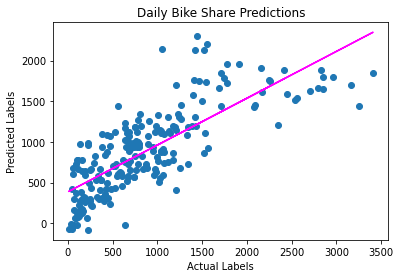

In [4]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Experimente um algoritmo de árvore de decisão

Como alternativa a um modelo linear, há uma categoria de algoritmos para aprendizado de máquina que usa uma abordagem baseada em árvore na qual os recursos do conjunto de dados são examinados em uma série de avaliações, cada uma delas resultando em uma ramificação em uma árvore de decisão baseada sobre o valor do recurso. No final de cada série de ramificações estão os nós-folha com o valor de rótulo previsto com base nos valores dos recursos.

É mais fácil ver como isso funciona com um exemplo. Vamos treinar um modelo de regressão de Árvore de Decisão usando os dados de aluguel de bicicletas. Após treinar o modelo, o código abaixo imprimirá a definição do modelo e uma representação de texto da árvore que ele usa para prever os valores dos rótulos.



In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_7 <= 0.26
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_7 >  0.26
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |   |--- val

Então agora temos um modelo baseado em árvore; mas é bom? Vamos avaliá-lo com os dados de teste.

MSE: 234857.18181818182
RMSE: 484.62065764697013
R2: 0.5395772355376928


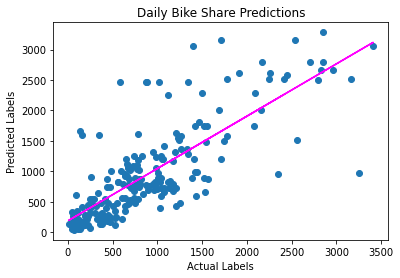

In [6]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

O modelo baseado em árvore não parece ter melhorado em relação ao modelo linear, então o que mais poderíamos tentar?

## Experimente um algoritmo de conjunto

Os algoritmos de conjunto funcionam combinando vários estimadores de base para produzir um modelo ideal, seja aplicando uma função agregada a uma coleção de modelos de base (às vezes referido a um ensacamento ) ou construindo uma sequência de modelos que se baseiam uns nos outros para melhorar o desempenho preditivo ( conhecido como reforço ).

Por exemplo, vamos tentar um modelo Random Forest, que aplica uma função de média a vários modelos de Árvore de Decisão para um modelo geral melhor.

RandomForestRegressor() 

MSE: 112438.47352863639
RMSE: 335.31846583305907
R2: 0.7795714296952834


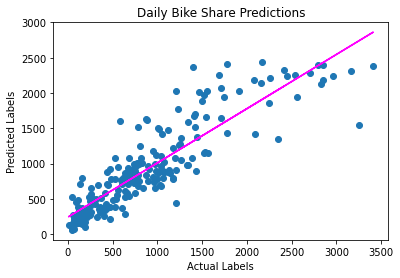

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Para uma boa medida, vamos também tentar um algoritmo de conjunto de reforço . Usaremos um estimador Gradient Boosting, que como um algoritmo Random Forest constrói várias árvores, mas em vez de construí-las de forma independente e obter o resultado médio, cada árvore é construída sobre as saídas da anterior na tentativa de reduzir incrementalmente o perda (erro) no modelo.

GradientBoostingRegressor() 

MSE: 104464.36585322407
RMSE: 323.2094767379572
R2: 0.7952041673088844


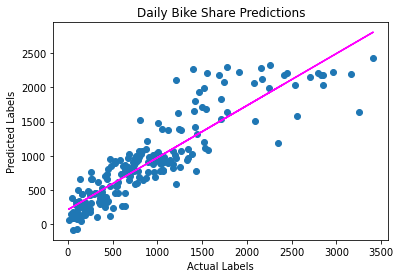

In [8]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Resumo

Aqui tentamos vários novos algoritmos de regressão para melhorar o desempenho. Em nosso notebook veremos como 'ajustar' esses algoritmos para melhorar o desempenho.

# Leitura adicional

Para saber mais sobre o Scikit-Learn, consulte a documentação do <b><a src="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics">Scikit-Learn</a></b> .